With reference to the MockSurveyData.xls dataset for visitors from a particular 
country,
a. List the areas you would look into when it comes to data preparation
b. Highlight any data idiosyncrasies that you might have observed
c. Put together a short presentation/document to tell a story about the key insights and
observations, taking into consideration dataset limitations.
• Please include your supporting scripts/output from a tool of your choice.

Importing all the necessary files

In [2]:
import matplotlib as plt
import sklearn as ski
import pandas as pd
import numpy as np
import seaborn as sea


In [3]:
df = pd.read_excel("../input/mocksurveydata/MockSurveyData.xlsx")
df.head(5)

,case,Year,R.mth,date,intv_nam,Country_residence,City_residence,Purpose_grp,Purpose,Weights_QTR,...,tototh_$,totshopping_$,totexp_$,MainAccomm,MainHotel,travel_companion.1,travel_companion.2,travel_companion.3,travel_companion.4,travel_companion.5
0,18,2015,January,2015-01-01,Cindy Liu,Indonesia,Yogyakarta,Leisure,Holiday/ Rest & Relax,632.145161,...,0.0,854.853136,1096.186995,Hotel,V Hotel Lavender,Spouse,Children aged 8-12 yrs,NaN,NaN,NaN
1,41,2015,January,2015-01-01,Philip Chew,Indonesia,Batam,Leisure,Holiday/ Rest & Relax,341.937500,...,0.0,171.519802,379.309926,Hotel,Madras Hotel,Spouse,Children aged 0-7 yrs,Friends,NaN,NaN
2,43,2015,January,2015-01-01,Philip Chew,Indonesia,Batam,Leisure,Holiday/ Rest & Relax,432.866667,...,0.0,104.853136,420.727677,Hotel,Hotel 81 - Geylang,Spouse,Children aged 8-12 yrs,NaN,NaN,NaN
3,44,2015,January,2015-01-01,Philip Chew,Indonesia,Batam,Leisure,Others,368.285714,...,0.0,220.853136,378.990074,Accommodation not required - Others,NaN,Partner/ Boyfriend/ Girlfriend,Parents/ Parents-in-law,Siblings,NaN,NaN
4,45,2015,January,2015-01-01,Philip Chew,Indonesia,Batam,Others/ Refused,"Others - Personal (e.g. weddings, funerals, etc)",315.254902,...,0.0,104.853136,342.356298,Hotel,Hotel 81 - Bencoolen,Parents/ Parents-in-law,Siblings,NaN,NaN,NaN


In [4]:
df.shape

(8887, 48)

In [5]:
df.describe(include='all')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,case,Year,R.mth,date,intv_nam,Country_residence,City_residence,Purpose_grp,Purpose,Weights_QTR,...,tototh_$,totshopping_$,totexp_$,MainAccomm,MainHotel,travel_companion.1,travel_companion.2,travel_companion.3,travel_companion.4,travel_companion.5
count,8887.000000,8887.000000,8887,8887,8887,8887,8887,8887,8887,8887.000000,...,8887.000000,8.887000e+03,8.887000e+03,8854,4297,8887,1632,490,94,17
unique,NaN,NaN,12,587,34,1,59,5,40,NaN,...,NaN,NaN,NaN,13,290,15,14,13,8,6
top,NaN,NaN,March,2015-07-31 00:00:00,Philip Chew,Indonesia,Jakarta,Leisure,Holiday/ Rest & Relax,NaN,...,NaN,NaN,NaN,Hotel,Mandarin Orchard Singapore,Alone,Siblings,Children aged 8-12 yrs,Siblings,Other relatives
freq,NaN,NaN,812,61,1856,8887,3867,5655,3244,NaN,...,NaN,NaN,NaN,4296,358,2883,467,101,24,8
first,NaN,NaN,NaN,2014-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2015-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,11521.140880,2014.503545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,592.199788,...,0.568938,3.155676e+03,3.685110e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,6615.259259,0.500016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,352.449669,...,7.632622,2.735708e+05,2.736304e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,15.000000,2014.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,8.086393e+01,8.086393e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,5623.500000,2014.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,419.090000,...,0.000000,1.018482e+02,2.070473e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8887 entries, 0 to 8886
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   case                8887 non-null   int64         
 1   Year                8887 non-null   int64         
 2   R.mth               8887 non-null   object        
 3   date                8887 non-null   datetime64[ns]
 4   intv_nam            8887 non-null   object        
 5   Country_residence   8887 non-null   object        
 6   City_residence      8887 non-null   object        
 7   Purpose_grp         8887 non-null   object        
 8   Purpose             8887 non-null   object        
 9   Weights_QTR         8887 non-null   float64       
 10  Air_Terminal        5697 non-null   object        
 11  Sea_Terminal        2828 non-null   object        
 12  Land_Terminal       355 non-null    object        
 13  langint             8887 non-null   object      

In [7]:
total_null = df.isnull().sum().sort_values(ascending=False)# summing up the null
total_null

travel_companion.5    8870
travel_companion.4    8793
Land_Terminal         8532
travel_companion.3    8397
travel_companion.2    7255
Sea_Terminal          6059
MainHotel             4590
Air_Terminal          3190
f5_designation        3096
f5_designation.oth    2969
f4_industry           2844
shop_$anti              80
shop_$fash              80
shop_$wat               80
shop_$well              80
shop_$food              80
shop_$gift              80
shop_$ctec              80
shop_$jew               80
shop_$oth               80
shop_$any               80
MainAccomm              33
langint                  0
Year                     0
R.mth                    0
date                     0
intv_nam                 0
Country_residence        0
City_residence           0
Purpose_grp              0
Purpose                  0
Weights_QTR              0
travel_companion.1       0
totexp_$                 0
1st_visit                0
length_stay              0
travel_type              0
f

In [8]:
percent_null = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) #finding the percentage of data which are null
percent_null

travel_companion.5    0.998087
travel_companion.4    0.989423
Land_Terminal         0.960054
travel_companion.3    0.944863
travel_companion.2    0.816361
Sea_Terminal          0.681782
MainHotel             0.516485
Air_Terminal          0.358951
f5_designation        0.348374
f5_designation.oth    0.334083
f4_industry           0.320018
shop_$anti            0.009002
shop_$fash            0.009002
shop_$wat             0.009002
shop_$well            0.009002
shop_$food            0.009002
shop_$gift            0.009002
shop_$ctec            0.009002
shop_$jew             0.009002
shop_$oth             0.009002
shop_$any             0.009002
MainAccomm            0.003713
langint               0.000000
Year                  0.000000
R.mth                 0.000000
date                  0.000000
intv_nam              0.000000
Country_residence     0.000000
City_residence        0.000000
Purpose_grp           0.000000
Purpose               0.000000
Weights_QTR           0.000000
travel_c

In [9]:
df = df.drop(['travel_companion.5','travel_companion.4','Land_Terminal','travel_companion.3','travel_companion.2','Sea_Terminal',
    'Air_Terminal','f5_designation','f5_designation.oth','f4_industry','case'],axis=1)
df

,Year,R.mth,date,intv_nam,Country_residence,City_residence,Purpose_grp,Purpose,Weights_QTR,langint,...,tottran_$,totbiz_$,totedu_$,totmedi_$,tototh_$,totshopping_$,totexp_$,MainAccomm,MainHotel,travel_companion.1
0,2015,January,2015-01-01,Cindy Liu,Indonesia,Yogyakarta,Leisure,Holiday/ Rest & Relax,632.145161,English,...,11.492089,0.0,0,0.0,0.0,854.853136,1096.186995,Hotel,V Hotel Lavender,Spouse
1,2015,January,2015-01-01,Philip Chew,Indonesia,Batam,Leisure,Holiday/ Rest & Relax,341.937500,English,...,27.203704,0.0,0,0.0,0.0,171.519802,379.309926,Hotel,Madras Hotel,Spouse
2,2015,January,2015-01-01,Philip Chew,Indonesia,Batam,Leisure,Holiday/ Rest & Relax,432.866667,English,...,27.953499,0.0,0,0.0,0.0,104.853136,420.727677,Hotel,Hotel 81 - Geylang,Spouse
3,2015,January,2015-01-01,Philip Chew,Indonesia,Batam,Leisure,Others,368.285714,English,...,14.376085,0.0,0,0.0,0.0,220.853136,378.990074,Accommodation not required - Others,NaN,Partner/ Boyfriend/ Girlfriend
4,2015,January,2015-01-01,Philip Chew,Indonesia,Batam,Others/ Refused,"Others - Personal (e.g. weddings, funerals, etc)",315.254902,English,...,38.306962,0.0,0,0.0,0.0,104.853136,342.356298,Hotel,Hotel 81 - Bencoolen,Parents/ Parents-in-law
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8882,2014,December,2014-12-28,Philip Chew,Indonesia,Batam,Leisure,To shop/attend shopping events in Singapore,672.107143,English,...,11.010531,0.0,0,0.0,0.0,130.863932,152.884995,Accommodation not required - Day Tripper,NaN,Friends
8883,2014,December,2014-12-28,Philip Chew,Indonesia,Surabaya,Business+Accompanying Pax,General business purpose,628.281250,English,...,0.000000,20.0,0,0.0,0.0,80.863932,100.863932,Accommodation not required - Day Tripper,NaN,Others
8884,2014,December,2014-12-28,Philip Chew,Indonesia,Batam,Others/ Refused,"Others - Personal (e.g. weddings, funerals, etc)",1228.360000,English,...,3.670177,0.0,0,0.0,0.0,570.863932,794.744736,Accommodation not required - Day Tripper,NaN,Parents/ Parents-in-law
8885,2014,December,2014-12-28,Philip Chew,Indonesia,Surabaya,Leisure,Holiday/ Rest & Relax,400.192000,English,...,57.961905,0.0,0,0.0,0.0,280.863932,1157.292504,Hotel,Fragrance Hotel - Ruby,Others


In [10]:
object_columns_df = df.select_dtypes(include=['object','bool']) #taking a data frame for object columns
object_columns_df.head(5)

,R.mth,intv_nam,Country_residence,City_residence,Purpose_grp,Purpose,langint,1st_visit,length_stay,travel_type,f1_gender,f3_occupation,MainAccomm,MainHotel,travel_companion.1
0,January,Cindy Liu,Indonesia,Yogyakarta,Leisure,Holiday/ Rest & Relax,English,No,4 days,Non-Packaged,Male,"Businessman (small company, <50 people)",Hotel,V Hotel Lavender,Spouse
1,January,Philip Chew,Indonesia,Batam,Leisure,Holiday/ Rest & Relax,English,No,2 days,Packaged,Male,"Professiols (doctor, lawyer, lecturer, etc)",Hotel,Madras Hotel,Spouse
2,January,Philip Chew,Indonesia,Batam,Leisure,Holiday/ Rest & Relax,English,No,3 days,Non-Packaged,Female,Homemaker (Full time),Hotel,Hotel 81 - Geylang,Spouse
3,January,Philip Chew,Indonesia,Batam,Leisure,Others,English,No,1 day,Non-Packaged,Female,"Professiols (doctor, lawyer, lecturer, etc)",Accommodation not required - Others,NaN,Partner/ Boyfriend/ Girlfriend
4,January,Philip Chew,Indonesia,Batam,Others/ Refused,"Others - Personal (e.g. weddings, funerals, etc)",English,No,1 day,Packaged,Male,Student,Hotel,Hotel 81 - Bencoolen,Parents/ Parents-in-law


In [11]:
numerical_columns_df =df.select_dtypes(exclude=['object']) #Taking all the numerical columns in one data frame
numerical_columns_df.head(5)

,Year,date,Weights_QTR,shop_$fash,shop_$jew,shop_$wat,shop_$well,shop_$food,shop_$gift,shop_$ctec,...,shop_$any,totacc_$,totfnb_$,tottran_$,totbiz_$,totedu_$,totmedi_$,tototh_$,totshopping_$,totexp_$
0,2015,2015-01-01,632.145161,0.000000,0.0,0.0,0.0,0.0,0.0,750.0,...,750.000000,153.227847,76.613923,11.492089,0.0,0,0.0,0.0,854.853136,1096.186995
1,2015,2015-01-01,341.937500,66.666667,0.0,0.0,0.0,0.0,0.0,0.0,...,66.666667,155.740741,24.845679,27.203704,0.0,0,0.0,0.0,171.519802,379.309926
2,2015,2015-01-01,432.866667,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,148.153546,139.767496,27.953499,0.0,0,0.0,0.0,104.853136,420.727677
3,2015,2015-01-01,368.285714,25.000000,0.0,0.0,0.0,0.0,91.0,0.0,...,116.000000,0.000000,143.760853,14.376085,0.0,0,0.0,0.0,220.853136,378.990074
4,2015,2015-01-01,315.254902,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,153.227847,45.968354,38.306962,0.0,0,0.0,0.0,104.853136,342.356298


pearson coefficeint will provide the best fitted features.

In [12]:
pearson_coefficeint = df.corr(method='pearson')
pearson_coefficeint

,Year,Weights_QTR,shop_$fash,shop_$jew,shop_$wat,shop_$well,shop_$food,shop_$gift,shop_$ctec,shop_$anti,...,shop_$any,totacc_$,totfnb_$,tottran_$,totbiz_$,totedu_$,totmedi_$,tototh_$,totshopping_$,totexp_$
Year,1.000000,-0.094281,-0.023033,-0.014298,-0.000256,0.011961,0.032330,0.023015,0.005395,-0.012537,...,-0.016205,-0.083596,0.054081,0.045598,0.012791,-0.001339,-0.032269,0.002644,-0.010668,-0.010973
Weights_QTR,-0.094281,1.000000,-0.007865,0.011853,-0.000629,0.000678,0.010083,-0.030454,0.003260,-0.003964,...,-0.004363,-0.030882,-0.023895,-0.043059,-0.031028,-0.003664,-0.032258,-0.015257,-0.017899,-0.018221
shop_$fash,-0.023033,-0.007865,1.000000,0.001792,0.040886,0.137925,0.054094,-0.000984,0.006589,0.018766,...,0.830700,0.124816,0.138151,0.097191,-0.009195,-0.002124,0.020891,0.001537,0.377560,0.128921
shop_$jew,-0.014298,0.011853,0.001792,1.000000,-0.002062,0.014915,0.008666,-0.004475,-0.001894,-0.000669,...,0.284013,-0.002750,0.009048,0.009468,-0.001085,-0.000862,0.000887,-0.002463,0.111417,0.022221
shop_$wat,-0.000256,-0.000629,0.040886,-0.002062,1.000000,0.039500,0.008134,0.019262,0.015035,0.001437,...,0.228377,0.026035,0.013958,0.008795,-0.002147,-0.001655,0.000232,0.000564,0.242940,0.051945
shop_$well,0.011961,0.000678,0.137925,0.014915,0.039500,1.000000,0.063791,-0.008685,0.005154,-0.000306,...,0.312876,0.083433,0.117177,0.108468,0.004635,-0.004338,0.012441,0.001568,0.385482,0.113375
shop_$food,0.032330,0.010083,0.054094,0.008666,0.008134,0.063791,1.000000,0.014677,0.036717,-0.002964,...,0.204806,0.077796,0.075220,0.063442,-0.002856,0.003637,0.029039,-0.010891,0.312341,0.108967
shop_$gift,0.023015,-0.030454,-0.000984,-0.004475,0.019262,-0.008685,0.014677,1.000000,-0.017187,-0.002611,...,0.075849,0.046520,0.034667,0.020160,0.002406,0.013242,-0.020430,0.017609,0.133547,0.019893
shop_$ctec,0.005395,0.003260,0.006589,-0.001894,0.015035,0.005154,0.036717,-0.017187,1.000000,-0.002628,...,0.238456,0.031130,0.050079,0.057866,0.021611,-0.003354,-0.005637,-0.004503,0.340252,0.070954
shop_$anti,-0.012537,-0.003964,0.018766,-0.000669,0.001437,-0.000306,-0.002964,-0.002611,-0.002628,1.000000,...,0.257907,-0.006590,0.067934,0.031791,-0.001283,-0.000537,-0.001730,0.052425,0.008798,0.006513


Heat Map and pearson coefficient plot

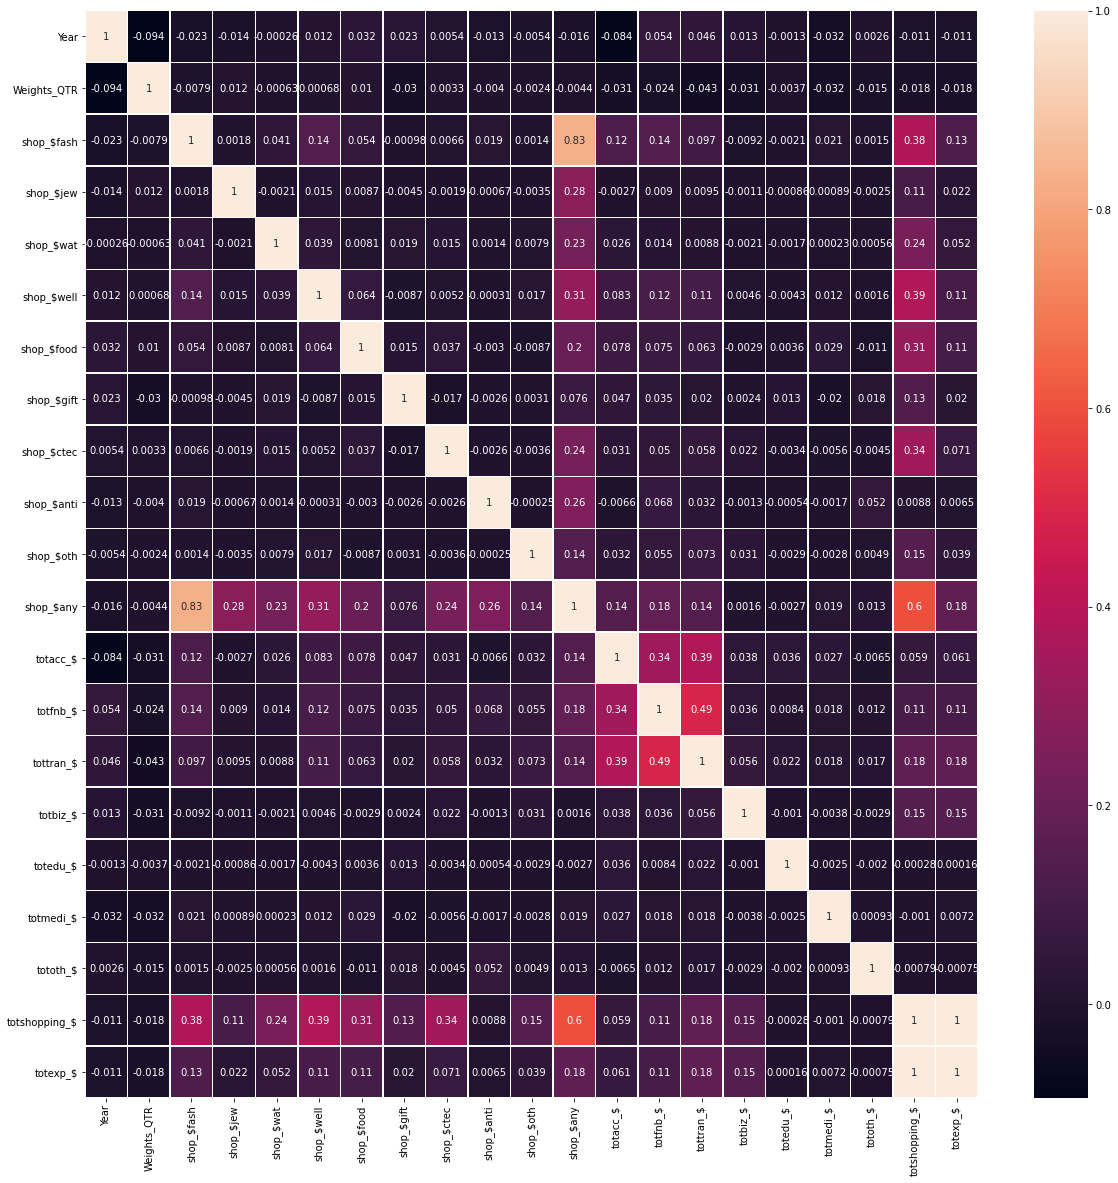

In [17]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20))
sea.heatmap(pearson_coefficeint, annot=True, linewidths=.5, ax=ax)
#sea.heatmap(, cmap='RdBu_r',annot=True)